<a href="https://colab.research.google.com/github/cyborg-anand/time-series/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.734985,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351761,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296722,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


In [15]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-12-16,251.039993,251.039993,251.380005,247.649994,247.990005,51694800
2024-12-17,253.479996,253.479996,253.830002,249.779999,250.080002,51356400
2024-12-18,248.050003,248.050003,254.279999,247.740005,252.160004,56774100
2024-12-19,249.789993,249.789993,252.000000,247.089996,247.500000,60882300
2024-12-20,254.490005,254.490005,255.000000,245.690002,248.039993,146890100


In [16]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2024-01-02 to 2024-12-20
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  246 non-null    float64
 1   (Close, AAPL)      246 non-null    float64
 2   (High, AAPL)       246 non-null    float64
 3   (Low, AAPL)        246 non-null    float64
 4   (Open, AAPL)       246 non-null    float64
 5   (Volume, AAPL)     246 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5 KB


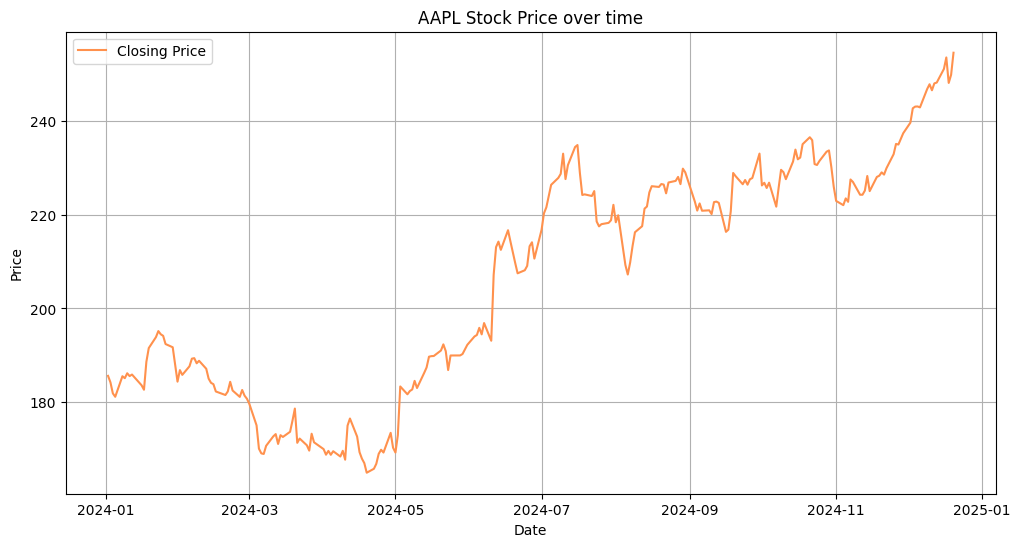

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label = 'Closing Price', color = '#FF914D')
plt.title('AAPL Stock Price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Classical time series decomposition

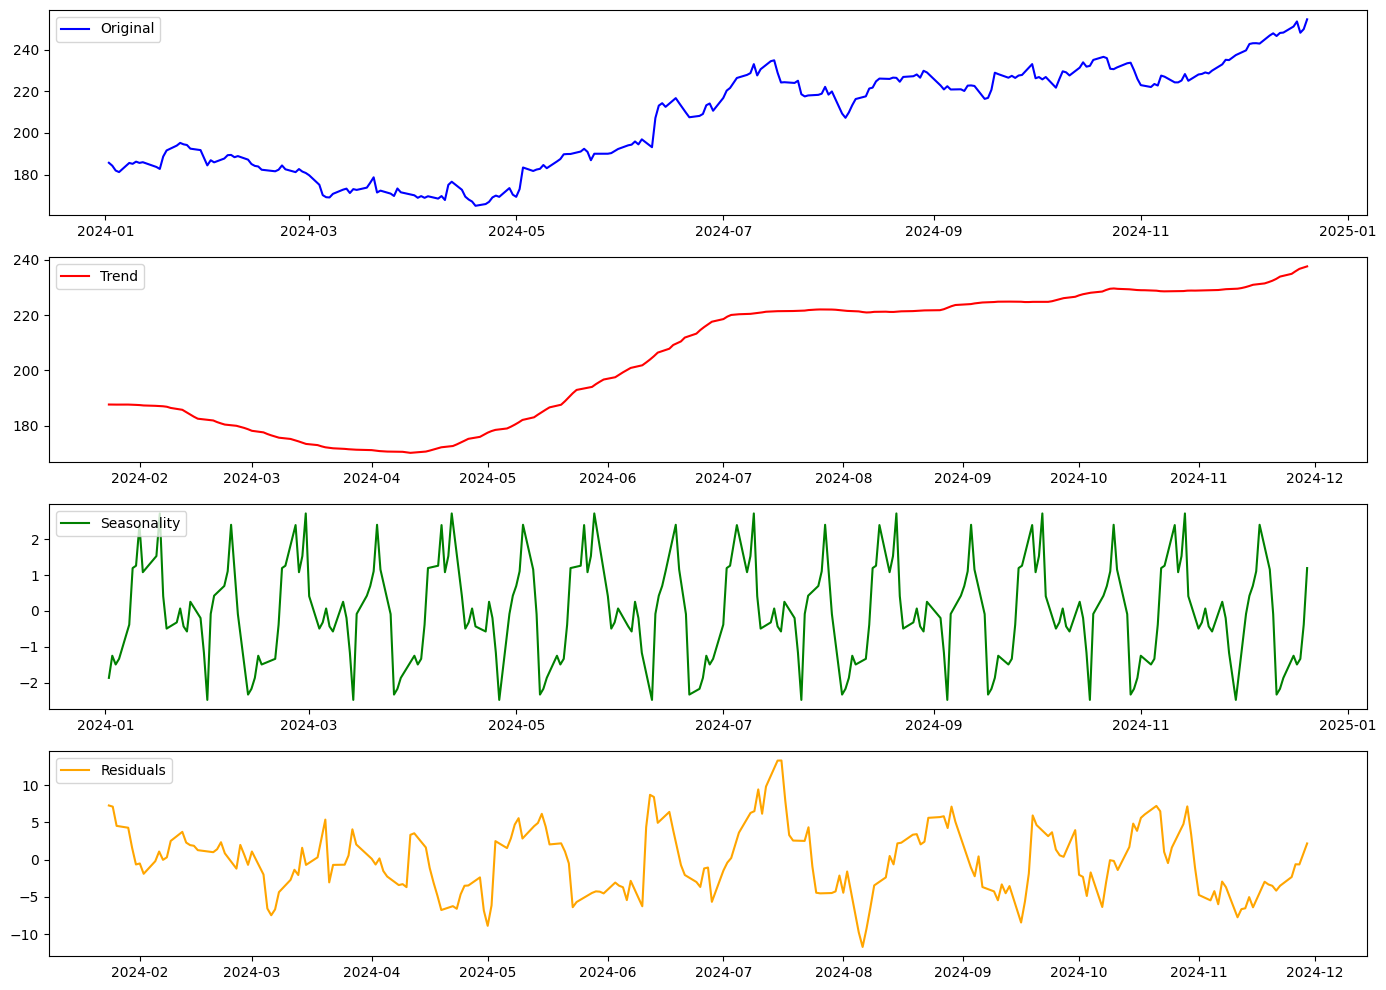

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)
trend_additive = decomposed_additive.trend
seasonal_additive = decomposed_additive.seasonal
residual_additive = decomposed_additive.resid

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot( stock_data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residuals', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()